## Import Libs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import json

/home/adarshm26/envs/dwdm_assignment/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


## Import District Shapefile

In [2]:
india_districts = gpd.read_file('India_Districts_ADM2_GADM-shp/India_Districts_ADM2_GADM.shp')
india_districts.head()

,FID,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
0,1,105,IND,India,17,Karnataka,239,Shimoga,None,None,District,District,"POLYGON ((75.12553 14.62678, 75.13207 14.62507..."
1,2,105,IND,India,17,Karnataka,240,Tumkur,None,None,District,District,"MULTIPOLYGON (((76.97153 14.05239, 76.94973 14..."
2,3,105,IND,India,17,Karnataka,241,Udupi,None,None,District,District,"MULTIPOLYGON (((74.78125 13.09931, 74.78069 13..."
3,4,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
4,5,105,IND,India,17,Karnataka,242,Uttar Kannand,None,None,District,District,"MULTIPOLYGON (((74.48292 14.01125, 74.48292 14..."


<AxesSubplot:>

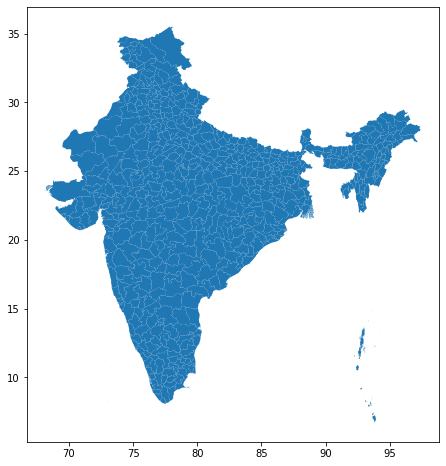

In [3]:
india_districts.plot(figsize = (8,8))

## Import CSV data of Pollutants (Source CPCB 2015 data)

In [4]:
from os import listdir

complete_aqi_file_list = [f for f in listdir('CPCB_Data') if '.csv' in f]
aqi_data_list = []
for file in complete_aqi_file_list:
    aqi_data_list.append(pd.read_csv('CPCB_Data/'+file, sep=',', header=0))
aqi_data = pd.concat(aqi_data_list)
aqi_data.head(5)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,Unnamed: 11
0,55,05-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN,NaN
1,55,08-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN,NaN
2,55,13-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN,NaN
3,55,16-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0,NaN
4,55,21-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0,NaN


## Find latitude and longitude data of Addresses for plotting (No need to run now)

In [ ]:
# import time
# from opencage.geocoder import OpenCageGeocode
# from pprint import pprint

### Get unique addresses

In [ ]:
# uniques = aqi_data[['State', 
#           'City/Town/Village/Area', 
#           'Location of Monitoring Station']].drop_duplicates(subset='Location of Monitoring Station')
# uniques.head()

### Fetch latitude-longitude using OpenCageData

In [ ]:
# key = '95909fcea515495090a24df07c865742'
# geocoder = OpenCageGeocode(key)
# lat_dict = {}
# long_dict = {}
# errors = []
# for index, row in uniques.iterrows():
#     try:
#         query = ', '.join([row['Location of Monitoring Station'],
#                           row['City/Town/Village/Area'], 
#                           row['State']])
#         results = geocoder.geocode(query)
#         station = row['Location of Monitoring Station']
#         geom = results[0]['geometry']
#         lat_dict[station] = geom['lat']
#         long_dict[station] = geom['lng']
#         print('Successful', index, station)
#     except Exception:
#         print('Failed', index, station)
#         errors.append((index, station))
#     time.sleep(1.02)

### Add missing data for failed results from previous cell

In [ ]:
# missing_coords = {
#     'Rasulpur, Near Balgopalpur Industrial Area': {
#         'lat': 21.496299,
#         'long': 86.919635
#     },
#     'Near Overhead Water Tank of M/s PPT': {
#         'lat': 20.28623,
#         'long': 86.6421
#     },
#     'Near Barabati Stadium, Tulasipur': {
#         'lat': 20.464874,
#         'long': 85.866405
#     },
#     'Near Hindu College, Market Road, Guntur': {
#         'lat': 16.305425,
#         'long': 80.421963
#     },
#     'Near Nutrine Confectionery, Palamaner Road, Chittor': {
#         'lat': 13.20071,
#         'long': 79.08204
#     },
#     'Near ICL Industries, Yerrangunta, Kadapa District': {
#         'lat': 14.46734,
#         'long': 78.85423
#     },
#     'Near Court Centre, Ongole, Parkasam District': {
#         'lat': 15.50599,
#         'long': 80.04994
#     },
#     'Raipur Road, Near parag Diary, Dehradun': {
#         'lat': 30.31693,
#         'long': 78.053634
#     },
#     'Himalaya Drug Co. Near ISBT': {
#         'lat': 30.3097,
#         'long': 78.04891
#     },
#     'Near Air India Office, Surat': {
#         'lat': 21.18578,
#         'long': 72.83679
#     },
#     'Tristar Intermediate, Unit-II, Plot no-3321,GIDC Sarigam,Sarigam': {
#         'lat': 20.276435,
#         'long': 72.848973
#     },
#     'Regional Office MPPCB,Dharwari GaliNo.5,House No.318, Satna': {
#         'lat': 24.5552,
#         'long': 80.81748
#     },
#     'Sub-divisional Office E/M Light Machniery, Satna': {
#         'lat': 24.57601,
#         'long': 80.8009
#     },
#     'Mahadwar Road, Near Mahalaxmi Temple, Kolhapur': {
#         'lat': 16.77422,
#         'long': 74.552963
#     },
#     'M/s Apurva Oil and Industries Pvt. Ltd., A-23, MIDC, Amravati Dist.': {
#         'lat': 20.913165,
#         'long': 77.759052
#     },
#     'Bachat Bhawan, Near S P Office, Jalna': {
#         'lat': 19.84437,
#         'long': 75.872544
#     },
#     'Bank of Baroda Building, Near Pimpri-Chinchwad M.C. Building': {
#         'lat': 18.529265,
#         'long': 73.852043
#     },
#     'KSPCB Bldg. Hebbal Ind. Area, Mysore': {
#         'lat': 12.305115,
#         'long': 76.644608
#     },
#     'KHB Industrial Area, Near R.R. Founders, Yelahanka, Bangalore': {
#         'lat': 13.09935,
#         'long': 77.59256
#     },
#     'M/S Associated Chem Pvt Ltd, Fazalganj, Kanpur': {
#         'lat': 26.45986,
#         'long': 80.30382
#     },
#     'Hindu College, Main Gate, Buddh Bazar, Station Road': {
#         'lat': 28.83379,
#         'long': 78.77168
#     },
#     'Central Police Hospital, Police traning Centre, Civil Lines': {
#         'lat': 28.854425,
#         'long': 78.764755
#     },
#     'Petrol Pump, Civil Lines, Near Prabha Cinema': {
#         'lat': 28.37984,
#         'long': 79.404831
#     },
#     'Khoya Mandi, Tiraha Lucknow Road, Rai Bareilly': {
#         'lat': 26.22947,
#         'long': 81.233872
#     },
#     'M/s Punjab Maltex Pvt. Ltd. Sports and Surgical Complex, Kapurthala Road, Jalandhar': {
#         'lat': 31.324105,
#         'long': 75.579952
#     },
#     'H. Lalthuama Building, Near D.C. Office, Project Veng, Kolasib': {
#         'lat': 24.22647,
#         'long': 92.6794
#     },
#     'Above the Fire Brigade Station, Near Birth 5A & 6A of Mormugao,Port Trust, Vasco': {
#         'lat': 15.388115,
#         'long': 73.84111
#     },
#     'Near Railway Station at Kalem, Sanguem': {
#         'lat': 15.29214,
#         'long': 74.18304
#     },
#     'Near District Office KSPCB, Makkamkunnu, Pathanamthitta': {
#         'lat': 9.26458,
#         'long': 76.78669
#     },
#     'Kakkanchery, near KINFRA, Malappuram': {
#         'lat': 11.14714,
#         'long': 75.88554
#     },
#     'Export Promotion Industrial Park (EPIP). Byrnihat,Ri-Bhoi dist Meghalaya': {
#         'lat': 25.862695,
#         'long': 91.802624
#     },
#     'Office building of Add Chief Engineer,PHED, Araimille, Tura West Garo Hills District': {
#         'lat': 25.51408,
#         'long': 90.18945
#     },
#     'Office Premises of the O/o BDO, C & RD Block, Khliehriat': {
#         'lat': 25.36334,
#         'long': 92.36144
#     },
#     'Regional Laboratory, HPSPCB, BBMB Colony, Sunder Nagar, Distt. Mandi': {
#         'lat': 31.706094,
#         'long': 76.934376
#     },
#     'Near Pragjyotish College, Santipur, Guwahati': {
#         'lat': 26.162155,
#         'long': 91.744832
#     },
#     'Daranga, Baska district, BATAD,Assam near Sandoop Jhankar town of Bhutan': {
#         'lat': 26.77646,
#         'long': 91.49781
#     },
#     'Office building of RLO, near Ithkola Market, Ghaniwala road': {
#         'lat': 31.822449,
#         'long': 77.29829
#     },
#     'Water Resources Division Office Campus, Christian Patty, near Nagaon College': {
#         'lat': 26.349055,
#         'long': 92.681938
#     },
#     "Campus of PWD Rural Division, near Gordon Boy's GS School, Dist- Nalbari": {
#         'lat': 26.443114,
#         'long': 91.436192
#     }
# }
# for key in missing_coords:
#     if key in uniques['Location of Monitoring Station'].array:
#         lat_dict[key] = missing_coords[key]['lat']
#         long_dict[key] = missing_coords[key]['long']
#     else:
#         print(key, 'missing')

### Load latitude and longitude

In [5]:
with open('long_data.txt', 'r') as f:
    long_dict = json.loads(f.read())
with open('lat_data.txt', 'r') as f:
    lat_dict = json.loads(f.read())

### Construct sample GeoDataFrame for plot

In [6]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(long_dict.values(), lat_dict.values())]
pollution_geom = gpd.GeoDataFrame(geometry = geometry)

<AxesSubplot:>

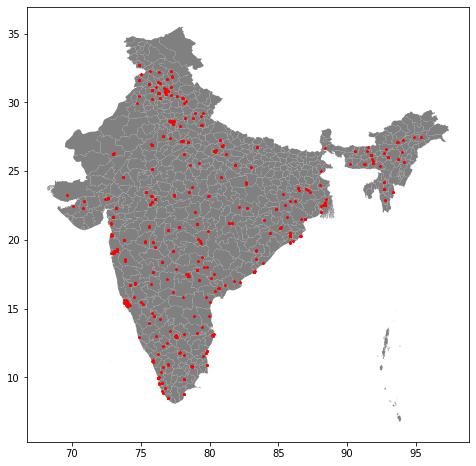

In [7]:
fig, ax = plt.subplots(1, figsize=(8,8))
base = india_districts.plot(ax=ax, color='grey')
pollution_geom.plot(ax=base, color='red', markersize=5, marker='*')

### Find incorrect results from OpenCageData using India's map as ROI

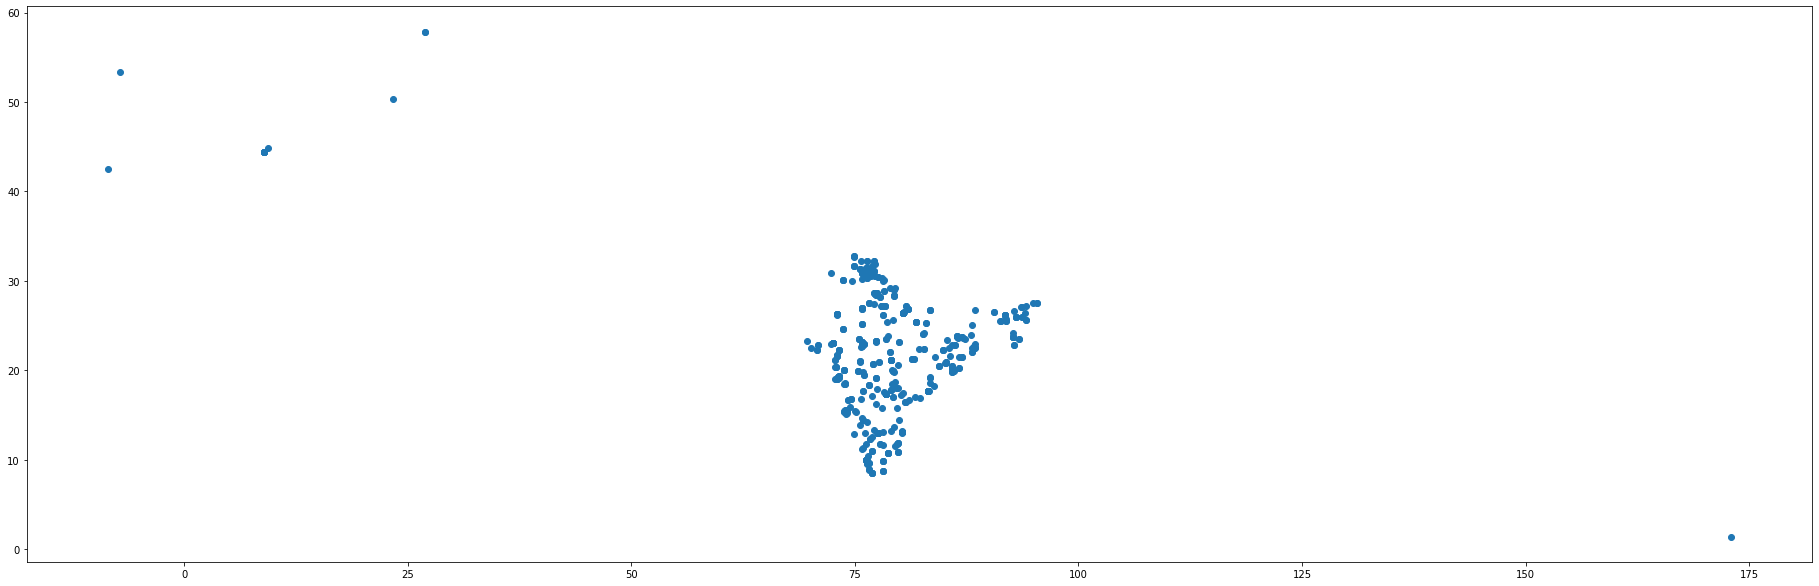

In [10]:
# pollution_geom.geometry.plot()
'''For reference purposes'''
from IPython.display import Image
Image(filename='all.png')

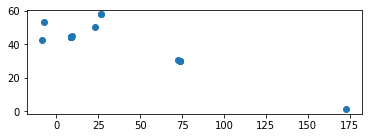

In [9]:
# india_administrative = gpd.read_file('IND_adm/IND_adm0.shp')
# india_administrative.plot()
# pollution_geom.crs = "epsg:4326"
# outside_india = pollution_geom.geometry.disjoint(india_administrative.geometry.iloc[0])
# pollution_geom[outside_india].plot()
'''For reference purposes'''
Image(filename='outliers.png')

### Dump latitude, longitude, errors and outliers to file

In [ ]:
# with open('outliers.csv', 'w') as f:
#     f.write(outside_india.to_csv(header=['geometry']))
# with open('errors.txt', 'w') as f:
#     f.write(json.dumps(errors))
# with open('lat_data.txt', 'w') as f:
#     f.write(json.dumps(lat_dict))
# with open('long_data.txt', 'w') as f:
#     f.write(json.dumps(long_dict))

## Merge latitude longitude & create geometry for plot

In [11]:
aqi_data_copy = aqi_data.copy()
aqi_data_copy['latitude'] = aqi_data_copy['Location of Monitoring Station'].map(lat_dict)
aqi_data_copy['longitude'] = aqi_data_copy['Location of Monitoring Station'].map(long_dict)
aqi_data_copy.sample()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,Unnamed: 11,latitude,longitude
267,371,01-07-15,Andhra Pradesh,Visakhapatnam,"Police Barracks, Visakhapatnam",Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",8.0,22.0,74.0,NaN,NaN,17.68009,83.20161


In [12]:
pollution_geom_copy = gpd.GeoDataFrame(aqi_data_copy, geometry=gpd.points_from_xy(aqi_data_copy.longitude, aqi_data_copy.latitude))
pollution_geom_copy[pollution_geom_copy['Location of Monitoring Station'].isna() == False].sample()                                  

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,Unnamed: 11,latitude,longitude,geometry
6949,711,16-11-15,Maharashtra,Nagpur,"MPCB Office Premises, Civil Lines, Nagpur",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",13.0,48.0,59.0,NaN,NaN,21.14631,79.08491,POINT (79.08491 21.14631)


### Check validity of geometry data of all rows

In [13]:
error_prone_points = pollution_geom_copy[pollution_geom_copy.geometry.is_valid == False]
error_prone_points[error_prone_points.columns.difference(['geometry'])]

,Agency,City/Town/Village/Area,Location of Monitoring Station,NO2,PM 2.5,RSPM/PM10,SO2,Sampling Date,State,Stn Code,Type of Location,Unnamed: 11,latitude,longitude
418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot using complete geodataframe

<AxesSubplot:>

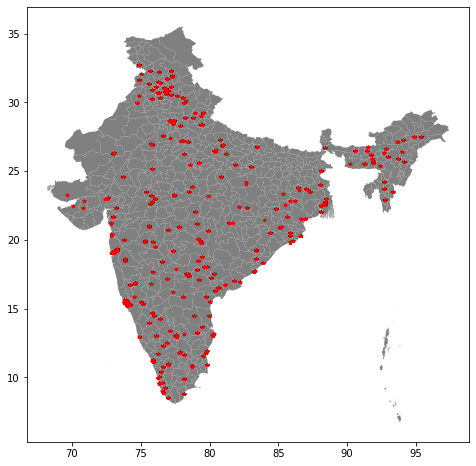

In [14]:
fig, ax = plt.subplots(1, figsize=(8,8))
base = india_districts.plot(ax=ax, color='grey')
pollution_geom_copy[pollution_geom_copy.geometry.is_valid == True].plot(ax=base, color='red', marker='*', markersize=5)

In [45]:
aqi_data = pollution_geom_copy[pollution_geom_copy.geometry.is_valid == True].copy()

In [46]:
def calculate_so2_aqi_range(so2):
    if pd.isna(so2):
        return float("nan")
    if so2<=40:
     si= so2*(50/40)
    elif 40<so2<=80:
     si= 50+(so2-40)*(5/4)
    elif 80<so2<=380:
     si= 100+(so2-80)/3
    elif 380<so2<=800:
     si= 200+(so2-380)/8
    elif 800<so2<=1600:
     si= 300+(so2-800)/8
    elif so2>1600:
     si= 400+(so2-1600)/8
    return si
aqi_data['si']=aqi_data["SO2"].apply(calculate_so2_aqi_range)

In [47]:
def calculate_no2_aqi_range(no2):
    if pd.isna(no2):
        return float("nan")
    if no2<=40:
     ni= no2*5/4
    elif 40<no2<=80:
     ni= 50+(no2-40)*(5/4)
    elif 80<no2<=180:
     ni= 100+(no2-80)
    elif 180<no2<=280:
     ni= 200+(no2-180)
    elif 280<no2<=400:
     ni= 300+(no2-280)*(5/6)
    elif no2>400:
     ni= 400+(no2-400)*(5/6)
    return ni
aqi_data['ni']=aqi_data['NO2'].apply(calculate_no2_aqi_range)

In [48]:
def calculate_PM2_5_aqi_range(pm2_5):
    if pd.isna(pm2_5):
        return float("nan")
    pm=pm2_5
    if pm<=30:
     pmi= pm*5/3
    elif 30<pm<=60:
     pmi= 50+(pm-30)*(5/3)
    elif 60<pm<=90:
     pmi= 100+(pm-60)*(10/3)
    elif 90<pm<=120:
     pmi= 200+(pm-90)*(10/30)
    elif 120<pm<=250:
     pmi= 300+(pm-120)*(10/13)
    elif pm>250:
     pmi= 400+(pm-250)*(10/13)
    return pmi
aqi_data['pmi2_5']=aqi_data['PM 2.5'].apply(calculate_PM2_5_aqi_range)

In [49]:
def calculate_PM10_aqi_range(pm10):
    if pd.isna(pm10):
        return float("nan")
    pm=10
    if pm<=50:
     pmi= pm
    elif 50<pm<=100:
     pmi= pm
    elif 100<pm<=250:
     pmi= 100+(no2-100)*(2/5)
    elif 250<pm<=350:
     pmi= 200+(pm-250)
    elif 350<pm<=430:
     pmi= 300+(pm-350)*(5/4)
    elif pm>430:
     pmi= 400+(pm-430)*(5/4)
    return pmi
aqi_data['pmi10']=aqi_data['RSPM/PM10'].apply(calculate_PM10_aqi_range)

In [50]:
def calculate_AQI(si,ni,pmi2_5,pmi10):
    t=[]
    for x in (si,ni,pmi2_5,pmi10):
        if not pd.isna(x):
            t.append(x)
    try:
        a=max(t)
        return a
    except ValueError:
        return float("nan")
aqi_data["AQI"]=aqi_data.apply(lambda x:calculate_AQI(x['si'],x['ni'],x['pmi2_5'],x['pmi10']),axis=1)

In [51]:
def get_aqi_category(aqi):
    aqi_category="Unknown"
    if 0<=aqi<=50:
        aqi_category="Good"
    elif 50<aqi<=100:
        aqi_category="Satisfactory"
    elif 100<aqi<=200:
        aqi_category="Moderately polluted"
    elif 200<aqi<=300:
        aqi_category="Poor"
    elif 300<aqi<=400:
        aqi_category="Very poor"
    elif 400<aqi<=500:
        aqi_category="Severe"
    elif 500<aqi:
        aqi_category="Extremely Severe"
    return aqi_category
aqi_data["AQI_category"]=aqi_data["AQI"].apply(get_aqi_category)

<AxesSubplot:>

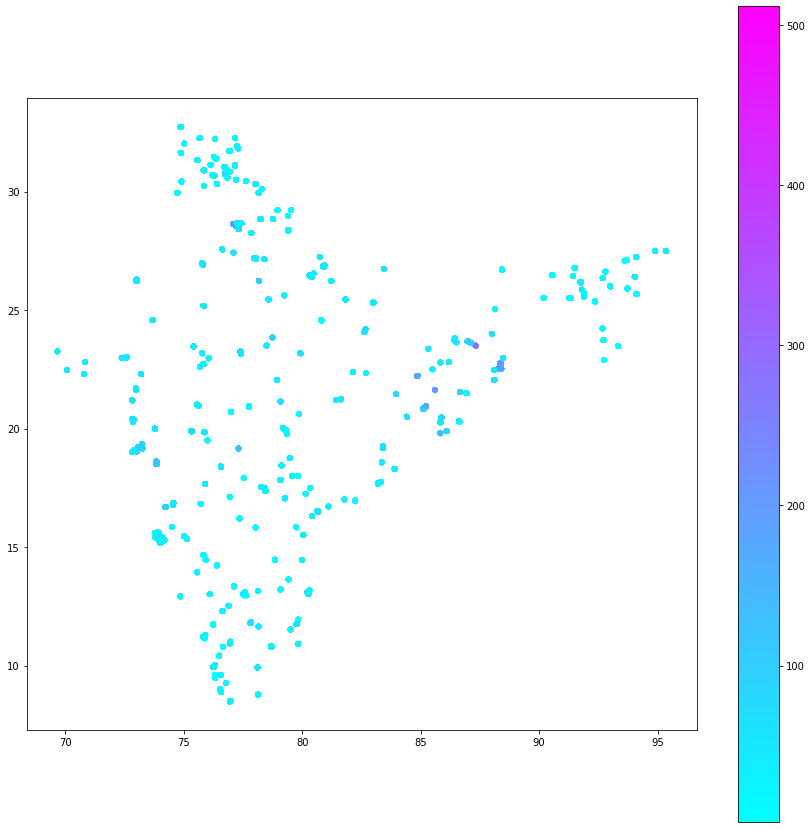

In [75]:
# heatmap_palette = {
#     'Unknown': 'grey',
#     'Good': '#FBCEB1',
#     'Satisfactory': '#F08080',
#     'Moderately polluted': '#E52B50',
#     'Poor': '#DA291C',
#     'Very poor': '#C04000',
#     'Severe': '#A50021',
#     'Extremely Severe': '#800000'
# }
aqi_data.plot(column='AQI', cmap='cool', markersize=20, figsize=(15,15), legend=True)